# Earthquake_real
> Non-Euclidean geometry

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Graph Laplacian, PCA]

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import networkx as nx
import folium

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')

- t = Year
- x = Latitude
- y = Longitude
- f = Magnitude

##### 1. 데이터 정의

In [26]:
_df = df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).query('Year>="2000"').reset_index().iloc[:,1:]
_df

,Date,Latitude,Longitude,Magnitude,Year
0,01/01/2000,-60.7220,153.6700,6.0,2000
1,01/02/2000,-17.9430,-178.4760,5.5,2000
2,01/02/2000,51.4470,-175.5580,5.8,2000
3,01/02/2000,-20.7710,-174.2360,5.8,2000
4,01/05/2000,-20.9640,-174.0970,5.6,2000
...,...,...,...,...,...
8739,12/28/2016,38.3917,-118.8941,5.6,2016
8740,12/28/2016,38.3777,-118.8957,5.5,2016
8741,12/28/2016,36.9179,140.4262,5.9,2016
8742,12/29/2016,-9.0283,118.6639,6.3,2016


##### 2. $f(x) = y + \epsilon$ 정의
- $y$ = Magnitude,  지진 규모로 정의

In [27]:
f_true = _df.loc[:,"Magnitude"]

In [28]:
f = f_true + np.random.normal(scale=0.2,size=len(f_true))

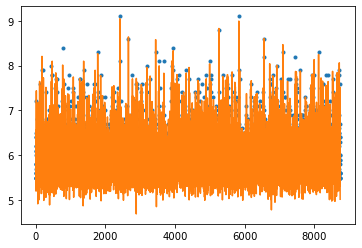

In [29]:
plt.plot(f_true,'.')
plt.plot(f,'-')

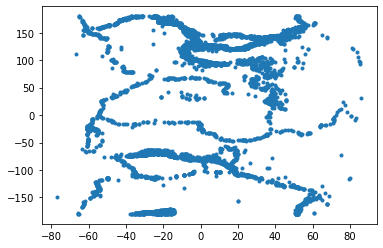

In [30]:
plt.plot( _df.Latitude,_df.Longitude,'.')

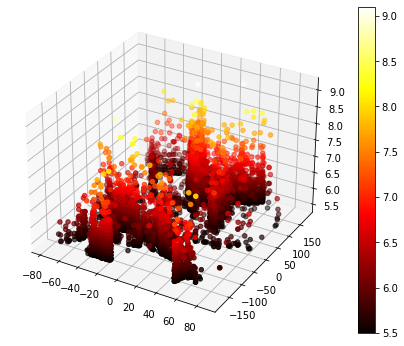

In [31]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(_df.Latitude, _df.Longitude, _df.Magnitude, c= _df.Magnitude,  cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [32]:
_dfgraph = df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).query('Year>="2000"').reset_index().iloc[:,1:].reset_index()

/tmp/ipykernel_160908/2573661339.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(_dfgraph.Year)


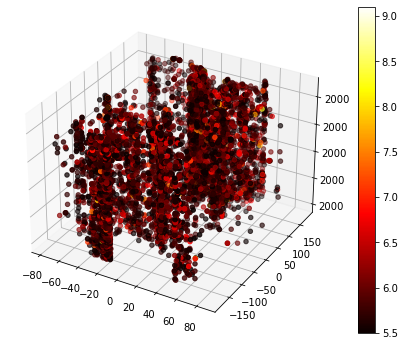

In [33]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zticklabels(_dfgraph.Year)
img = ax.scatter(_dfgraph.Latitude, _dfgraph.Longitude, _dfgraph.index,c= _dfgraph.Magnitude, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [34]:
from mpl_toolkits.basemap import Basemap

ImportError: cannot import name 'dedent' from 'matplotlib.cbook' (/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/matplotlib/cbook/__init__.py)

In [35]:
#collapse

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [36]:
#collapse

fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
lon = _df.Longitude
lat = _df.Latitude
x,y = m(lon, lat)
m.plot(x, y, 'r.', markersize=1)
draw_map(m)

NameError: name 'Basemap' is not defined

<Figure size 576x432 with 0 Axes>

In [37]:
#collapse

fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
lon = _df.Longitude
lat = _df.Latitude
x,y = m(lon, lat)
m.plot(x, y, 'r.', markersize=1)
draw_map(m)

NameError: name 'Basemap' is not defined

<Figure size 576x432 with 0 Axes>

In [38]:
#collapse
lst=[_df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2016-2000)]

In [39]:
#collapse
from folium import plugins 
data=(np.random.normal(size=(100,3)) + np.array([[28,77,5]])).tolist() # (좌표,weight)를 의미함, 그리고 numpy는 list가 될 수 없기 때문에 tolist 옵션 사용
m=folium.Map([28,77],zoom_start=6,scrollWheelZoom=False)
plugins.HeatMap(data).add_to(m) 

In [40]:
m=folium.Map(scrollWheelZoom=False)
plugins.HeatMapWithTime(lst,radius=5,index=list(range(2000,2016))).add_to(m)
m

##### 3. $(x_i,y_i)$와 $(x_j,y_j)$ 사이의 유클리드 거리 정의
- $x$ = Latitude, 위도로 정의
- $y$ = Longitude, 경도로 정의
- 지진의 영향이 주변에만 끼치는 것을 고려하여 경도, 위도의 차이가 90도 이내인 경우만 거리 계산

$$dist((x_i,y_i),(x_j,y_j)) = \sqrt{((x_j-x_i)^2+(y_j-y_i)^2}$$

In [41]:
def dist(i,j):
    if abs( _df.Latitude[j] - _df.Latitude[i] ) > 90: 
        return 1000  
    elif abs( _df.Longitude[j] - _df.Longitude[i] ) > 90: 
        return 1000
    else:
        return np.sqrt( ( ( _df.Latitude[j] - _df.Latitude[i] )**2) + ( ( _df.Longitude[j] - _df.Longitude[i])**2) )

##### 4. 거리를 이용한 $W_{i,j}$ 행렬 정의
- a weighted adjacency matrix $W$
- 동일한 지점 상의 거리는 0이 되어 $W_{i,j}$가 1이 될 것이다(대각행렬은 모두 1)
- 연결강도로 생각

$$W_{i,j}=\begin{cases}{exp(-\frac{[dist(i,j)]^2}{2\theta^2})} & \quad \text{if } dist(i,j) \leq κ \\ 0 & \quad \text{otherwise} \end{cases}$$

In [42]:
def weight(i,j,theta=150,kappa=1000):
    return np.exp( -np.abs(dist(i,j))**2 / (2*theta**2) ) if dist(i,j) <= kappa else 0

In [ ]:
W = np.array([[weight(i,j) for i in range(len(_df))] for j in range(len(_df))])

In [ ]:
W.round(3)

In [ ]:
plt.hist(W.reshape(-1))

그래프

링크의 방향성이 없는 네트워크 nx.Graph

In [ ]:
nx.draw(nx.Graph(W))
# 저장하고 싶으면
# plt.show(
# plt.savefig("networkGraph.png")

##### 5. $W_{i,j}$ 행렬을 이용한 차수 행렬 정의
- $D$ = Degree Matrix

In [ ]:
D = np.diag(W.sum(axis=1))

In [ ]:
D

##### 6. Graph Laplacian matrix 정의
- $L = D - W$

In [ ]:
L = D - W

In [ ]:
L

##### 7. 고유값 분해
- ${\bf L} = {\boldsymbol\Psi} {\boldsymbol\Lambda} {\boldsymbol\Psi}^\top$
- $\Psi^\top \Psi = I$

In [ ]:
λ, Ψ = np.linalg.eig(L)

In [ ]:
Λ = np.diag(λ)

##### 8. p
- $compk = f @ np.outer(Ψ[:,k], Ψ[:,k]) $
    - $k = 1, 2, 3, 8000$
- $p = (sum(comp1^2),sum(comp2^2),…,sum(comp8000^2))$
- $p = p/sum(p)$
    - 0.2 0.1  ...
- —> 5개의 최상의 컴포넌트만 골랐더니 70%

https://greeksharifa.github.io/machine_learning/2021/08/14/GFT/

https://ahjeong.tistory.com/14

In [ ]:
def comp(i):
    return (f @ np.outer( Ψ[:,i], Ψ[:,i]))

In [ ]:
def p(i):
    return sum(comp(i)**2)

In [ ]:
p(0)

In [ ]:
p_sum = sum(np.array([p(i) for i in range(1,len(_df))]))

In [ ]:
array_1 = np.array([p(i) for i in range(1,len(_df))])

In [ ]:
varprop = array_1/array_1.sum()

In [ ]:
_index = pd.DataFrame({'index':range(1,len(_df)),'varprop':varprop}).sort_values('varprop')

In [ ]:
plt.plot(array_1[np.argsort(array_1)])

In [ ]:
plt.plot( (f @ np.outer( Ψ[:,0], Ψ[:,0]))**2)
plt.ylim(0,40)

In [ ]:
_index

In [ ]:
plt.plot( (f @ np.outer( Ψ[:,_index.index[0]+1], Ψ[:,_index.index[0]+1 ]))**2)

In [ ]:
plt.plot( (f @ np.outer( Ψ[:,_index.index[1]+1], Ψ[:,_index.index[1]+1 ]))**2)

In [ ]:
plt.plot( (f @ np.outer( Ψ[:,_index.index[2]+1], Ψ[:,_index.index[2]+1 ]))**2)

In [ ]:
plt.plot( (f @ np.outer( Ψ[:,_index.index[3]+1], Ψ[:,_index.index[3]+1 ]))**2)

---

GCN

In [ ]:
def g(i):
    return np.exp(-5*λ[i])

In [ ]:
g_i = np.array([g(i) for i in range(len(_df))])

In [ ]:
plt.plot(g_i)

In [ ]:
sum(g(0)*(f @ np.outer( Ψ[:,0], Ψ[:,0]))*Ψ[:,0])

---

##### 9. PCA

In [ ]:
comp1 = f @ np.outer( Ψ[:,0], Ψ[:,0])

In [ ]:
comp2 = f @ np.outer( Ψ[:,_index.index[0]+1], Ψ[:,_index.index[0]+1])

In [ ]:
comp3 = f @ np.outer( Ψ[:,_index.index[1]+1], Ψ[:,_index.index[1]+1])

In [ ]:
comp4 = f @ np.outer( Ψ[:,_index.index[2]+1], Ψ[:,_index.index[2]+1])

In [ ]:
comp5 = f @ np.outer( Ψ[:,_index.index[3]+1], Ψ[:,_index.index[3]+1])

In [ ]:
___df = _df

In [ ]:
___df["comp1"] = comp1

In [ ]:
___df["comp2"] = comp2

In [ ]:
___df["comp3"] = comp3

In [ ]:
___df["comp4"] = comp4

In [ ]:
___df["comp5"] = comp5

In [ ]:
#collapse
_lst=[___df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2016-2000)]

In [ ]:
#collapse
__lst1=[___df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,5]].\
to_numpy().tolist() for i in range(2016-2000)]

In [ ]:
#collapse
__lst2=[___df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,6]].\
to_numpy().tolist() for i in range(2016-2000)]

In [ ]:
#collapse
__lst3=[___df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,7]].\
to_numpy().tolist() for i in range(2016-2000)]

In [ ]:
#collapse
__lst4=[___df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,8]].\
to_numpy().tolist() for i in range(2016-2000)]

In [ ]:
#collapse
__lst5=[___df.assign(Year=list(map(lambda x: x.split('/')[-1], _df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,9]].\
to_numpy().tolist() for i in range(2016-2000)]

In [ ]:
_m=folium.Map(scrollWheelZoom=False)
#plugins.HeatMapWithTime(_lst,radius=5,index=list(range(2000,2016))).add_to(_m)
plugins.HeatMapWithTime(__lst1,radius=5,index=list(range(2015,2000))).add_to(_m)
#plugins.HeatMapWithTime(__lst2,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst3,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst4,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst5,radius=5,index=list(range(2000,2016))).add_to(_m)
_m

In [ ]:
_m=folium.Map(scrollWheelZoom=False)
#plugins.HeatMapWithTime(_lst,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst1,radius=5,index=list(range(2000,2016))).add_to(_m)
plugins.HeatMapWithTime(__lst2,radius=50,index=list(range(2015,2000))).add_to(_m)
#plugins.HeatMapWithTime(__lst3,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst4,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst5,radius=5,index=list(range(2000,2016))).add_to(_m)
_m

In [ ]:
_m=folium.Map(scrollWheelZoom=False)
#plugins.HeatMapWithTime(_lst,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst1,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst2,radius=5,index=list(range(2000,2016))).add_to(_m)
plugins.HeatMapWithTime(__lst3,radius=50,index=list(range(2015,2000))).add_to(_m)
#plugins.HeatMapWithTime(__lst4,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst5,radius=5,index=list(range(2000,2016))).add_to(_m)
_m

In [ ]:
_m=folium.Map(scrollWheelZoom=False)
#plugins.HeatMapWithTime(_lst,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst1,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst2,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst3,radius=5,index=list(range(2000,2016))).add_to(_m)
plugins.HeatMapWithTime(__lst4,radius=50,index=list(range(2015,2000))).add_to(_m)
#plugins.HeatMapWithTime(__lst5,radius=5,index=list(range(2000,2016))).add_to(_m)
_m

In [ ]:
_m=folium.Map(scrollWheelZoom=False)
#plugins.HeatMapWithTime(_lst,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst1,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst2,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst3,radius=5,index=list(range(2000,2016))).add_to(_m)
#plugins.HeatMapWithTime(__lst4,radius=5,index=list(range(2000,2016))).add_to(_m)
plugins.HeatMapWithTime(__lst5,radius=50,index=list(range(2015,2000))).add_to(_m)
_m

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
lon = _df.Longitude
lat = _df.Latitude
x,y = m(lon, lat)
scale = 1
m.plot(x, y, 'g.', markersize=5, alpha=0.1)
#m.plot(x[np.argsort(λ)[1:10]], y[np.argsort(λ)[1:10]], 'r-', markersize=10)
m.scatter(x, y, color='orange', s=abs(f[0])*scale, alpha=abs(f[0])*0.1)
#m.scatter(x, y, color='violet', s=abs(f[np.argsort(p_sum)[-2]])*scale)
#m.scatter(x, y, color='purple', s=abs(f[np.argsort(p_sum)[-3]])*scale)
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
lon = _df.Longitude
lat = _df.Latitude
x,y = m(lon, lat)
scale = 1
m.plot(x, y, 'g.', markersize=5, alpha=0.1)
#m.scatter(x, y, color='orange', s=abs(f[np.argsort(p_sum)[-1]])*scale)
m.scatter(x, y, color='violet', s=abs(f[np.argsort(array_1)[-1]])*scale,alpha=abs(f[np.argsort(array_1)[-1]])*0.1)
#m.scatter(x, y, color='purple', s=abs(f[np.argsort(p_sum)[-3]])*scale)
draw_map(m)

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
lon = _df.Longitude
lat = _df.Latitude
x,y = m(lon, lat)
scale = 1
m.plot(x, y, 'g.', markersize=5, alpha=0.1)
#m.scatter(x, y, color='orange', s=abs(f[np.argsort(p_sum)[-1]])*scale)
#m.scatter(x, y, color='violet', s=abs(f[np.argsort(p_sum)[-2]])*scale)
m.scatter(x, y, color='purple', s=abs(f[np.argsort(array_1)[0]])*scale,alpha=abs(f[np.argsort(array_1)[-2]])*0.1)
draw_map(m)

component1 빼고 component2 추정

---

ref: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html